Install and Import Relevant Libraries

In [1]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

Clone/Download this repository and put it into the root directory
https://github.com/ultralytics/yolov5


In [2]:
# Download the small YOLO pretrained model from ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements:  AutoUpdate skipped (offline)


YOLOv5  2025-1-10 Python-3.11.9 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Test the Yolo Model using a traffic image

In [3]:
results = model(os.path.join("images","traffic.jpeg"))
results.print()

C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING  NMS time limit 0.550s exceeded
image 1/1: 316x474 7 cars, 2 trucks
Speed: 2898.3ms pre-process, 1624.2ms inference, 2098.6ms NMS per image at shape (1, 3, 448, 640)


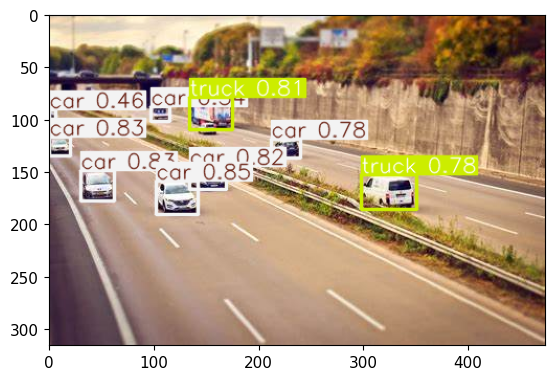

In [4]:
# Visualize the prediction using matplotlib
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Test the YOLO Pretrained Model on a live camera feed

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #detection setup
    results = model(frame)

    cv2.imshow('Object Recognition System', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'): # exit frame if the q key is pressed on the keyboard
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_

Generate Training Data for Drowsy and Awake
Also, Create a folder with this path - data/images


In [6]:
# Capture image and save images for our awake and drowsy class
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        # Feed from webcam
        ret, frame = cap.read()
        # image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # Save image to your file directory
        cv2.imwrite(imgname, frame)
        # render frame to screen
        cv2.imshow('Image collection', frame)
        
        time.sleep(5)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
   
cap.release()
cv2.destroyAllWindows()

Label the images between Awake and Drowsy.I'm using python pyqt5 Also, clone/download this repository https://github.com/tzutalin/labelImg if using pyqt5

In [7]:
%pip install pyqt5 lxml --upgrade
!git clone https://github.com/tzutalin/labelImg

Note: you may need to restart the kernel to use updated packages.


fatal: destination path 'labelImg' already exists and is not an empty directory.


In [8]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Fine-tuning the Drowsy - Awake Dataset with the Yolov5 Model

In [9]:
!cd yolov5 && py train.py --img 320 --batch 15 --epochs 400 --data dataset.yaml --weights yolov5s.pt

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: Ultralytics requirements ['thop>=0.1.1', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=15, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2025-1-11 Python-3.11.9 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="yolov5/runs/train/exp/weights/last.pt")

requirements: Ultralytics requirement ['setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements:  AutoUpdate skipped (offline)


Using cache found in C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-1-10 Python-3.11.9 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Testing the Fine-Tuned Model

In [16]:
img = os.path.join('data', 'images','drowsy.95b55b56-d011-11ef-abd0-38d57a6dc3b2.jpg')

In [17]:
results = model(img)

C:\Users\PEDRO OBI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [18]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 65.1ms pre-process, 750.7ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


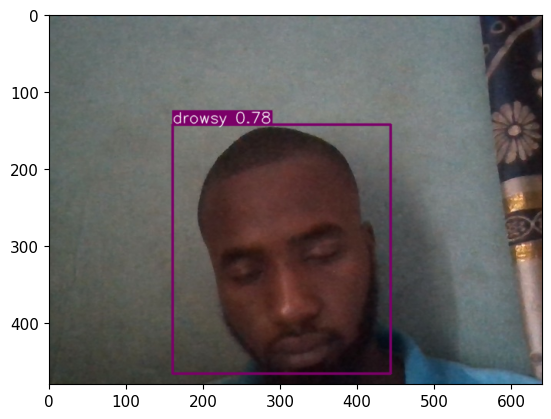

In [19]:
plt.imshow(np.squeeze(results.render()))
plt.show()